In [1]:
import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
my_palette = sns.color_palette(['#ce343c','#EC8A61', '#89d4b4','#0081A7', '#72C9C8', '#547474', '#8a567a', '#743D55','#b25a97', '#efb953'])

### read font
from matplotlib import font_manager

font_dirs = ['font']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

In [3]:
dict_off_x = {'SEX' : 0.01,
              'AGE' : 0.012,
              'INCOME' : 0.015,
              'RACE' : 0.07,
              'ETHNICITY' : 0.005,
              'EDUCATION' : 0.027
             }

dict_labels = {'AGE':{'CA01': 'age <= 29',  
                      'CA02': 'age between 30-54',  
                      'CA03': 'age >=55'},
               'INCOME':{'CE01': 'earnings <= $1250/month',  
                         'CE02': 'earnings between $1251-3333/month',  
                         'CE03': 'earnings >= $3333/month'},
               'RACE':{'CR01': 'White',  
                       'CR02': 'Black or African American', 
                       'CR04': 'Asian',  
                           },  
               'ETHNICITY':{'CT01': 'Not Hispanic or Latino',  
                            'CT02': 'Hispanic or Latino'},
               'EDUCATION':{'CD01': 'Less than high school',
                            'CD02': 'High school or equivalent, no college',
                            'CD03': 'Some college or Associate degree',
                            'CD04': 'Bachelor degree or advanced degree'},
               'SEX':{'CS01': 'Male',
                      'CS02': 'Female'}
              }

dict_ncol = {'SEX' : 1,
             'AGE' : 1,
             'INCOME' : 1,
             'RACE' : 1,
             'ETHNICITY' : 1,
             'EDUCATION' : 1
            }

dict_color = {'SEX' : 7,
             'AGE' : 5,
             'INCOME' : 1,
             'RACE' : 7,
             'ETHNICITY' : 4,
             'EDUCATION' : 0
            }

### Figure 4

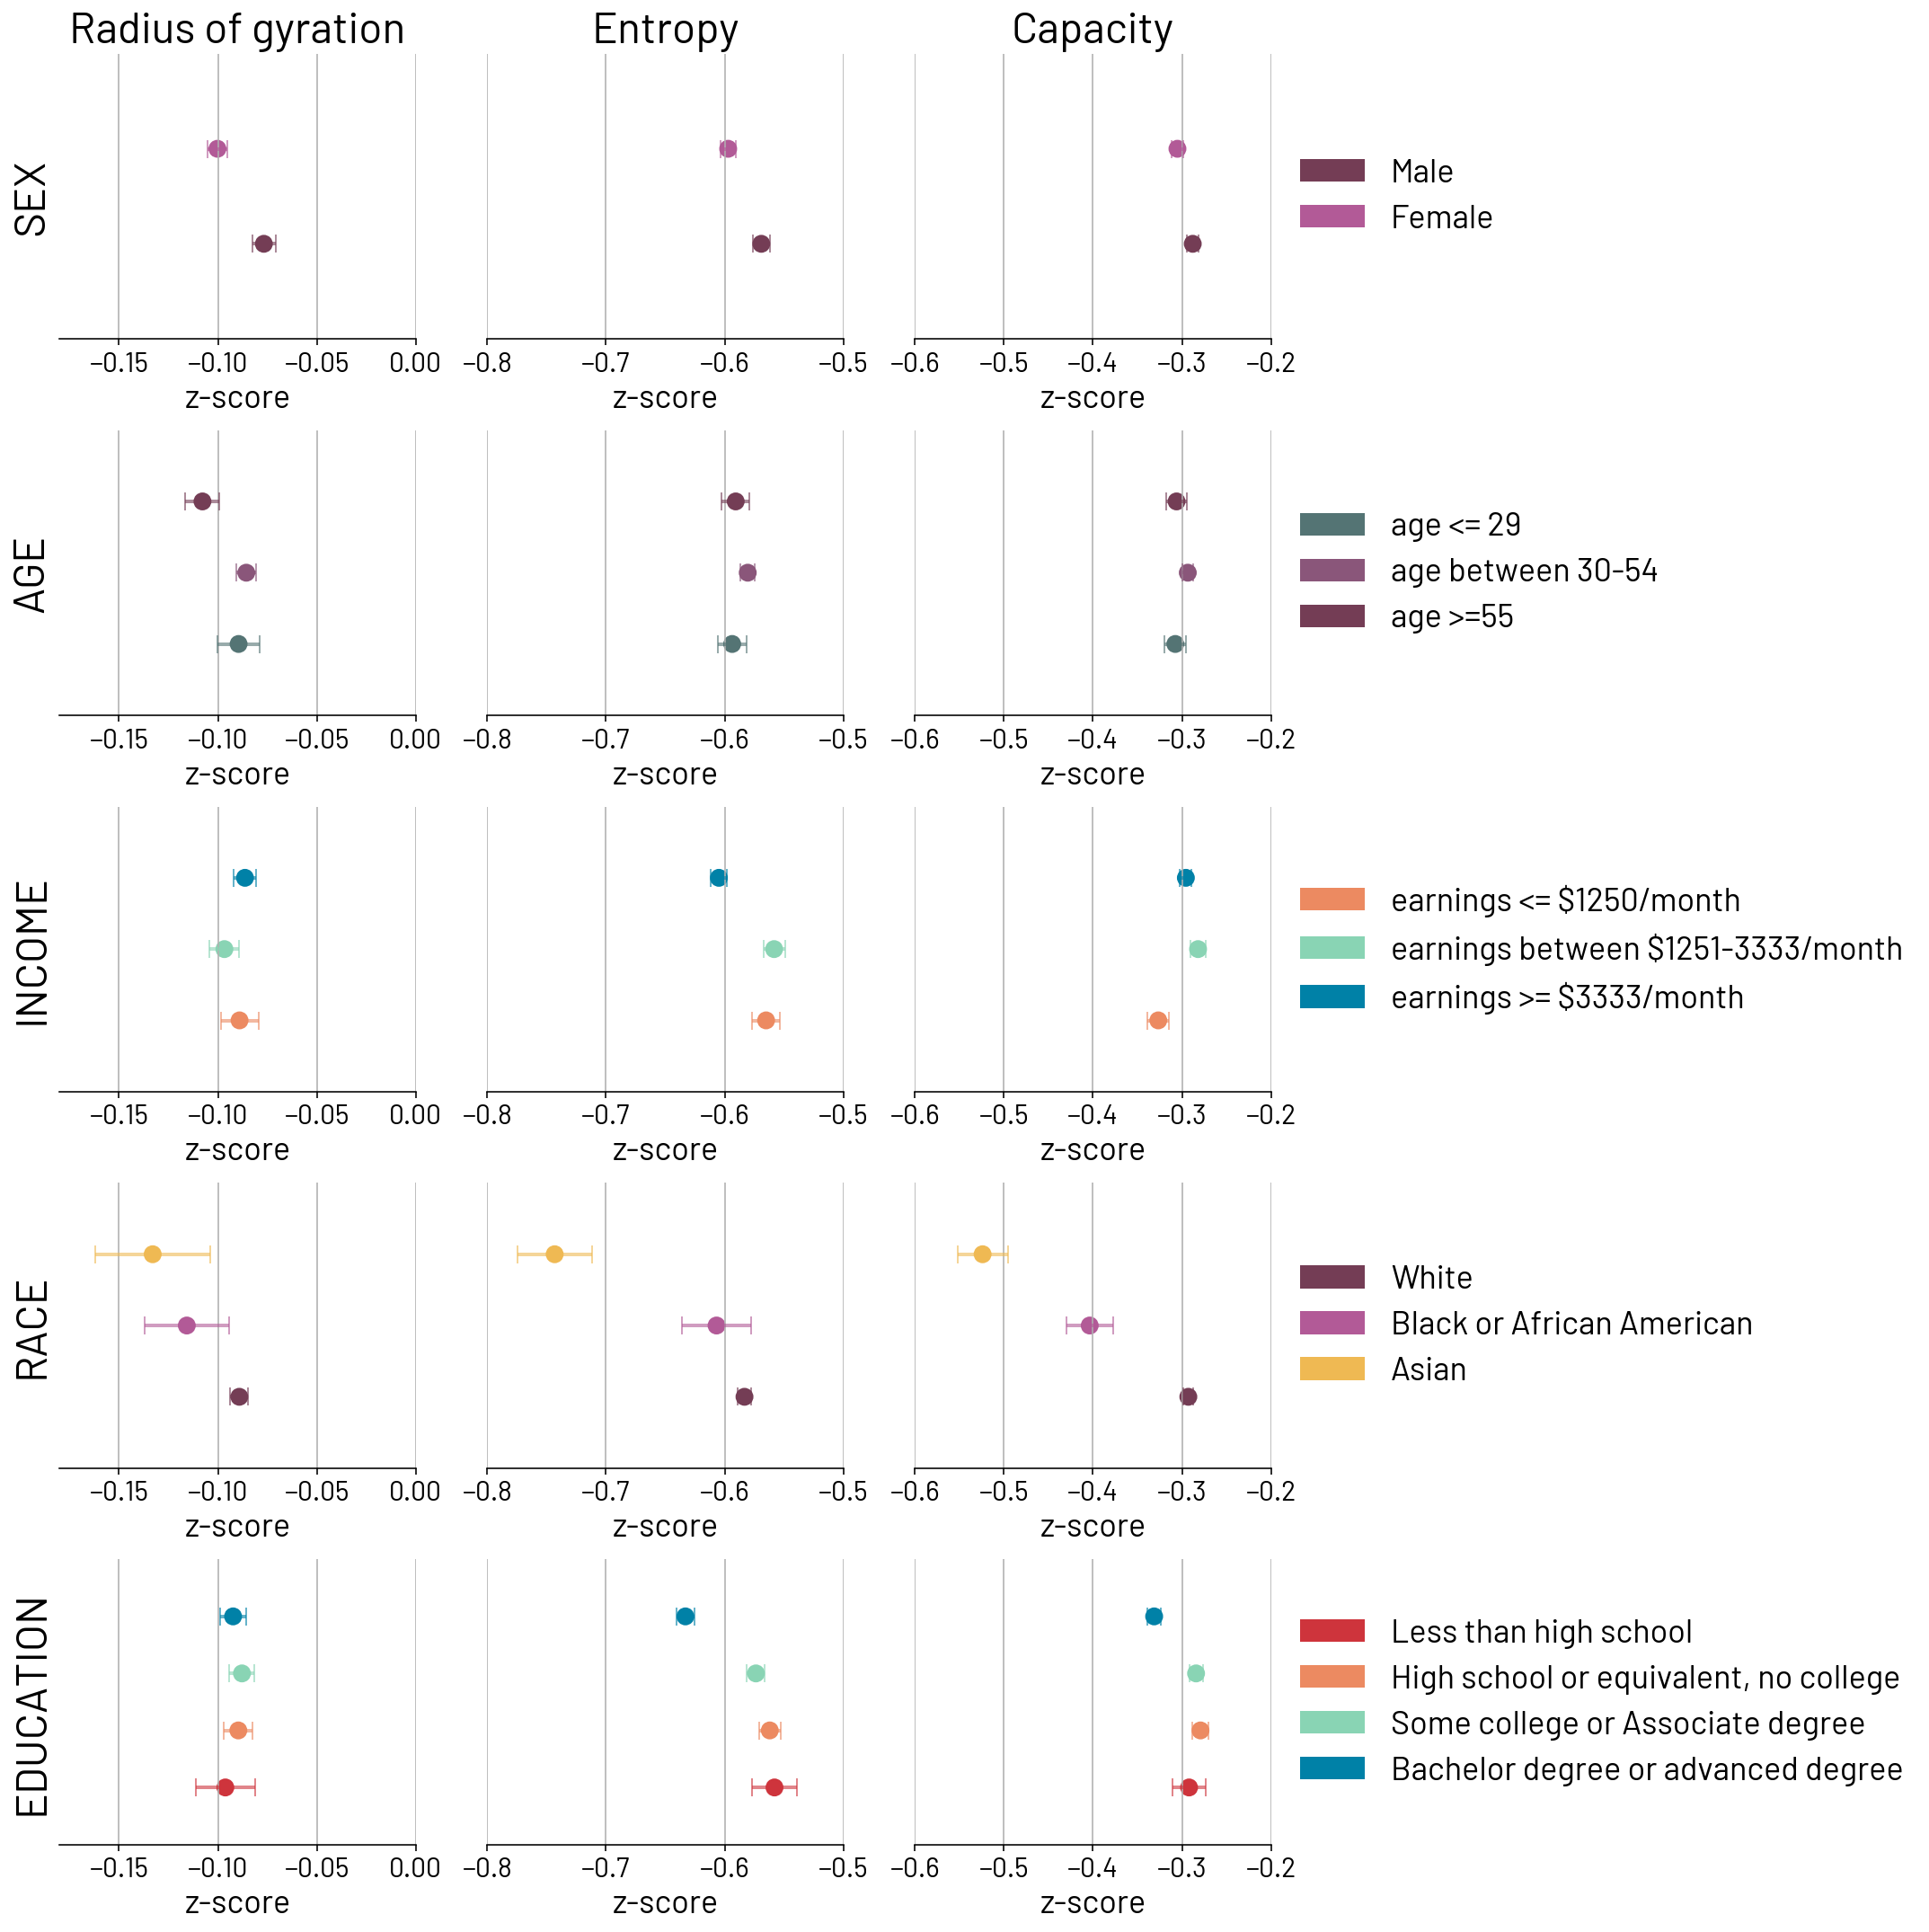

In [9]:
demographics = ['SEX','AGE','INCOME','RACE','EDUCATION']
metrics = ['zscore_radius_gyr_time','zscore_entropy_of_places_time','zscore_C']
mtr = ['Radius of gyration', 'Entropy', 'Capacity']

nrow, ncol = 5,3
fig, axes = plt.subplots(nrow, ncol, figsize=(15,15))
for r in range(nrow):
    for c in range(ncol):
        
        dem = demographics[r]
        metric = metrics[c]
        
        data = pd.read_csv(f'data_figs/fig4/data_fig4_{dem}_{metric}.csv').set_index(dem)

        # create y column
        data['y'] = range(len(data))

        # create a color for each point
        start = dict_color[dem]
        data['color'] = [my_palette[i] for i in range(start, start+len(data))]
               
        ##### PLOT
        off_x = dict_off_x[dem]
        off_y = 0.2

        axes[r,c].yaxis.set_tick_params(labelleft=False)
        axes[r,c].set_yticks([])
        axes[r,c].tick_params(axis='both', which='major', labelsize=15)

        data.plot.scatter(x='mean', y='y', color=data['color'], s=80, ax=axes[r,c])

        x_coords = [min(data['mean'])- off_x]*len(data)
        y_coords = data['y'].values


        legend_elements = []
        # loop for colors
        for index, row in data.iterrows():
            # errorbars
            axes[r,c].errorbar(x=row['mean'], y=row['y'], xerr=row['sem']*2, alpha=0.6, capsize=5, elinewidth=2, color=row['color'])
            # legend elements
            legend_elements.append(Patch(facecolor=row['color'], label=dict_labels[dem][index]))
        
        if c == ncol-1:
            axes[r,c].legend(handles=legend_elements, fancybox=True, shadow=True, loc='center left', bbox_to_anchor=(1, 0.5),  ncol=dict_ncol[dem], frameon=False, fontsize=18)#bbox_to_anchor=(0.5, -0.1),

        for w in ['top','right','left']:
            axes[r,c].spines[w].set_visible(False)

        axes[r,c].set_xlabel('z-score', fontsize=18)
        axes[r,c].set_ylabel('', fontsize=18)

        axes[r,c].xaxis.grid()


        if c == 0: # radius
            my_lim = (-0.18, 0) 
        elif c == 1:
            my_lim = (-0.8, -0.5) 
        else: # capacity
            my_lim = (-0.6, -0.2)
            
        axes[r,c].set_xlim(my_lim)
        axes[r,c].set_ylim((-1,len(data)))
        

for i in range(ncol):
    axes[0,i].set_title(mtr[i], fontsize=24)
for j in range(nrow):
    axes[j,0].set_ylabel(demographics[j], fontsize=24, rotation=90)
    
plt.tight_layout()